<a href="https://colab.research.google.com/github/agg-shambhavi/Deep-Learning/blob/master/Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats and Dogs
In this notebook, we will train a custom CNN model and we will visualize the various layers.



In [1]:
# downloading the zip files of the dataset
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O/tmp/cats_and_dogs_filtered.zip

--2020-08-17 14:27:44--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.166.128, 74.125.71.128, 74.125.133.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.166.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  51.3MB/s    in 1.3s    

2020-08-17 14:27:46 (51.3 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

# reading the zip file
zip_ref = zipfile.ZipFile(local_zip, 'r')
#extracting the contents of zip file in temp folder
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
os.getcwd()

'/content'

In [5]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.721.jpg', 'cat.711.jpg', 'cat.651.jpg', 'cat.4.jpg', 'cat.836.jpg', 'cat.669.jpg', 'cat.166.jpg', 'cat.152.jpg', 'cat.410.jpg', 'cat.402.jpg']
['dog.612.jpg', 'dog.806.jpg', 'dog.998.jpg', 'dog.431.jpg', 'dog.911.jpg', 'dog.211.jpg', 'dog.907.jpg', 'dog.293.jpg', 'dog.299.jpg', 'dog.535.jpg']


In [6]:
print('total training cat images : ', len(os.listdir(train_cats_dir)))
print('total training dog images : ', len(os.listdir(train_dogs_dir)))

print('total validation cat images : ', len(os.listdir(validation_cats_dir)))
print('total validation dog images : ', len(os.listdir(validation_dogs_dir)))

total training cat images :  1000
total training dog images :  1000
total validation cat images :  500
total validation dog images :  500


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

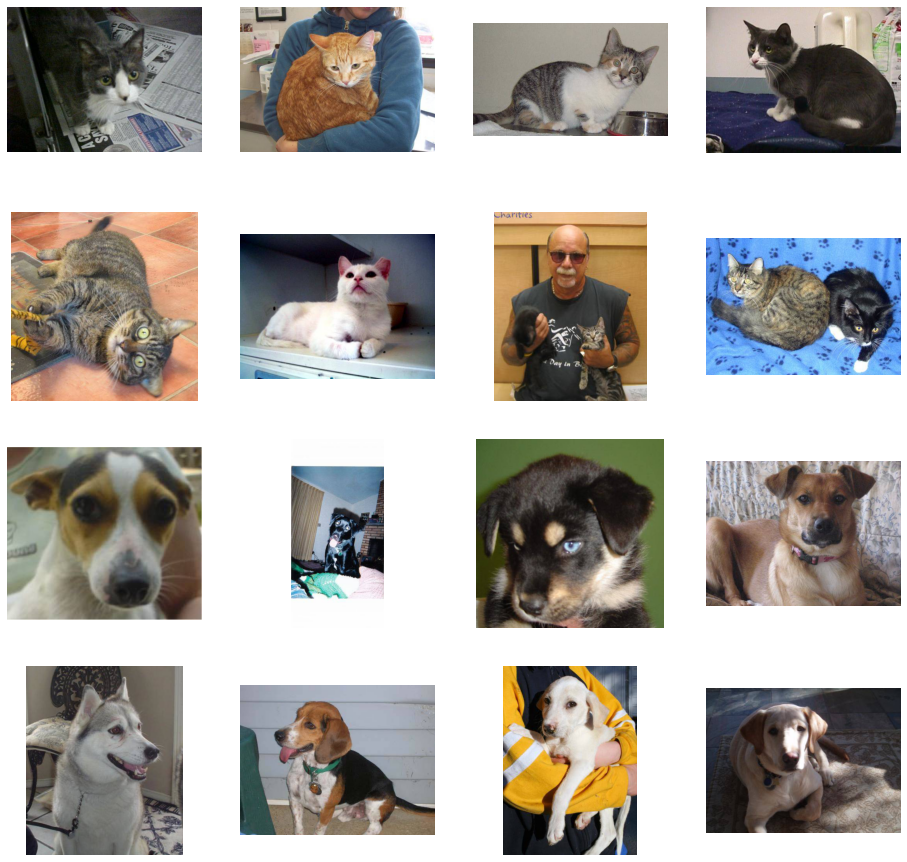

In [8]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir,fname) for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
  sp = plt.subplot(nrows,ncols, i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [9]:
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        class_mode = 'binary',
                                                        target_size = (150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit(train_generator,
                    validation_data= validation_generator,
                    steps_per_epoch=100,
                    epochs=15,
                    validation_steps=50,
                    verbose = 2)

Epoch 1/15
100/100 - 10s - loss: 0.7629 - accuracy: 0.5480 - val_loss: 0.6587 - val_accuracy: 0.6670
Epoch 2/15
100/100 - 10s - loss: 0.6412 - accuracy: 0.6520 - val_loss: 0.6182 - val_accuracy: 0.6140
Epoch 3/15
100/100 - 10s - loss: 0.5340 - accuracy: 0.7310 - val_loss: 0.5845 - val_accuracy: 0.6910
Epoch 4/15
100/100 - 10s - loss: 0.4581 - accuracy: 0.7875 - val_loss: 0.5633 - val_accuracy: 0.7140
Epoch 5/15
100/100 - 10s - loss: 0.4002 - accuracy: 0.8235 - val_loss: 0.5935 - val_accuracy: 0.7240
Epoch 6/15
100/100 - 10s - loss: 0.2821 - accuracy: 0.8825 - val_loss: 0.7173 - val_accuracy: 0.7200
Epoch 7/15
100/100 - 10s - loss: 0.1994 - accuracy: 0.9145 - val_loss: 0.9334 - val_accuracy: 0.7030
Epoch 8/15
100/100 - 10s - loss: 0.1410 - accuracy: 0.9465 - val_loss: 0.9449 - val_accuracy: 0.7190
Epoch 9/15
100/100 - 10s - loss: 0.0857 - accuracy: 0.9720 - val_loss: 1.0625 - val_accuracy: 0.7270
Epoch 10/15
100/100 - 10s - loss: 0.0632 - accuracy: 0.9770 - val_loss: 1.4319 - val_accura

# Visualizing CNN layers

# New Section

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


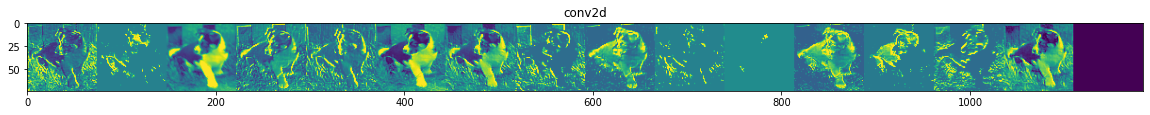

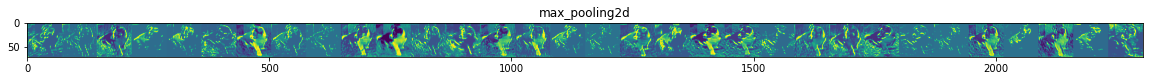

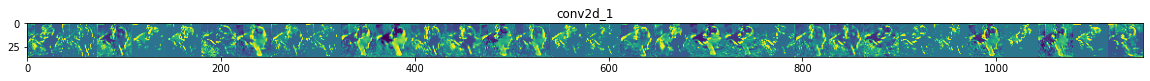

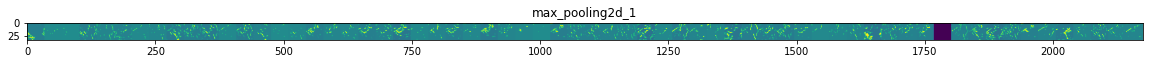

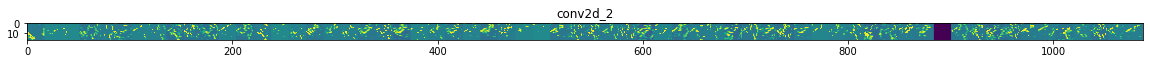

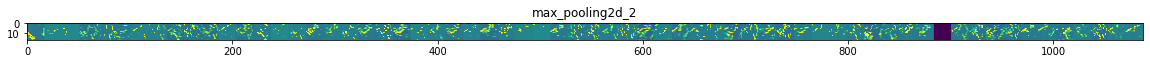

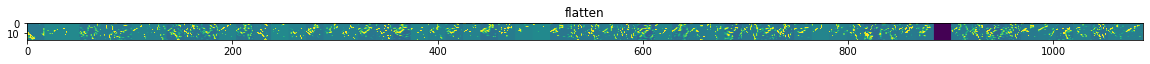

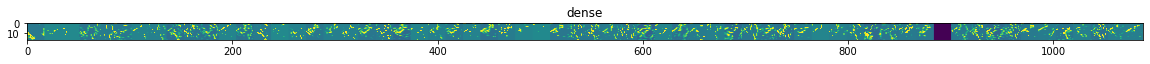

In [15]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs=model.input, outputs = successive_outputs)

cat_img_files = [os.path.join(train_cats_dir,f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir,f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150,150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

x /= 255.0

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]

    display_grid = np.zeros((size, size*n_features))

    for i in range(n_features):
      x = feature_map[0,:,:,i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x,0,255).astype('uint8')
      display_grid[:,i*size:(i+1) *size] = x

  scale = 20. / n_features
  plt.figure(figsize = (scale * n_features, scale))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and validation loss')

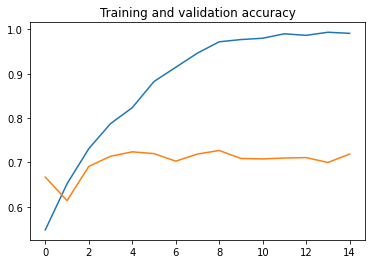

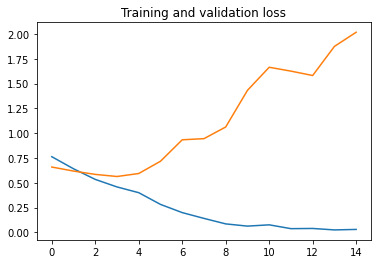

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs,loss)
plt.plot(epochs, val_loss)
plt.title("Training and validation loss")